__Equation__ https://cms.ucu.edu.ua/mod/vpl/view.php?id=344954&userid=9741

In [ ]:
"""
Equation.
"""

class Polynomial:
    """
    Polynomial class.
    """
    def __init__(self, coeffs:list) -> None:
        if isinstance(coeffs, tuple):
            coeffs=list(coeffs)
        if len(coeffs)==0 or coeffs==[0]:
            self.degree=0
            self.coeffs=[0]
        else:
            coeffs_copy=coeffs.copy()
            while coeffs_copy[0]==0:
                coeffs_copy.pop(0)
                if not coeffs_copy:
                    coeffs_copy=[0]
                    break
            coeffs_copy=coeffs_copy[::-1]
            self.coeffs=coeffs_copy
            self.degree=len(self.coeffs)-1

    @property
    def derivative(self)->str:
        """
        Derivative.
        """
        self.coeffs=self.coeffs[::-1]
        my_coeffs=self.coeffs[:-1]
        self.coeffs=self.coeffs[::-1]
        listok=[]
        counter=len(my_coeffs)
        for i in my_coeffs:
            listok.append(i*counter)
            counter-=1
        return Polynomial(listok)

    def eval_at(self, value:int)->int:
        """
        Solves the equation according to the given x.
        """
        result=0
        for i in range(self.degree+1):
            result+=self.coeffs[self.degree-i]*value**(self.degree-i)
        return result

    def multiply_by_value(self, value:int)->str:
        """
        Multiply by value.
        """
        new_coeffs=[i*value for i in self.coeffs]
        new_coeffs=new_coeffs[::-1]
        return Polynomial(new_coeffs)

    def __eq__(self, other: object) -> bool:
        if isinstance(other, Polynomial):
            return self.coeffs==other.coeffs
        if isinstance(other, int) and len(self.coeffs)==1:
            return self.coeffs[0]==other
        return False

    def __hash__(self)->int:
        return hash(f'{self.coeffs}')

    def __add__(self, other:object)->str:
        listok=[]
        if len(self.coeffs)!=len(other.coeffs):
            if len(self.coeffs)>len(other.coeffs):
                while len(self.coeffs)!=len(other.coeffs):
                    other.coeffs.append(0)
            else:
                while len(self.coeffs)!=len(other.coeffs):
                    self.coeffs.append(0)
        length=len(self.coeffs)
        for i in range(length):
            listok.append(self.coeffs[i]+other.coeffs[i])
        listok=listok[::-1]
        return Polynomial(listok)

    def __mul__(self, other: object)->str:
        new_degree = self.degree + other.degree
        new_coeffs = [0] * (new_degree + 1)
        for i in range(self.degree + 1):
            for j in range(other.degree + 1):
                new_coeffs[i + j] += self.coeffs[i] * other.coeffs[j]
        return Polynomial(new_coeffs[::-1])

    def __str__(self) -> str:
        if self.coeffs==[0]:
            return 'Polynomial: 0'
        string=''
        for i in range(self.degree+1):
            if self.coeffs[self.degree-i]==0:
                continue
            string+=f'{self.coeffs[self.degree-i]}x**{self.degree-i}'
            if self.degree-i-1>=0 and self.coeffs[self.degree-i-1]>0:
                string+='+'
        string=string.replace('x**0', '')
        string=string.replace('x**1', 'x')
        string=string.replace('1x', 'x')
        return f'Polynomial: {string}'

    def __repr__(self) -> str:
        coef=self.coeffs
        coef=coef[::-1]
        return f'Polynomial(coeffs={coef})'


class Quadratic(Polynomial):
    """
    Quadratic class.
    """
    def __init__(self, coeffs: list) -> None:
        super().__init__(coeffs)
        if len(self.coeffs)!=3:
            raise ValueError('Quadratic polynomial must have exactly 3 coefficients')
        self.coeffs=self.coeffs[::-1]
        self.a=self.coeffs[0]
        self.b=self.coeffs[1]
        self.c=self.coeffs[2]
        self.coeffs=self.coeffs[::-1]

    @property
    def discriminant(self)->int:
        """
        Find discriminant.
        """
        return self.b**2-4*self.a*self.c

    @property
    def number_of_real_roots(self)->int:
        """
        Show number of real roots.
        """
        if self.discriminant<0:
            return 0
        if self.discriminant==0:
            return 1
        return 2

    def get_real_roots(self)->list:
        """
        Get real roots.
        """
        if self.number_of_real_roots==0:
            return []
        if self.number_of_real_roots==1:
            root=-1*self.b/(2*self.a)
            return [int(root)]
        root1=(-1*self.b-self.discriminant**0.5)/(2*self.a)
        root2=(-1*self.b+self.discriminant**0.5)/(2*self.a)
        return [root1, root2]

    def __repr__(self) -> str:
        return f'Quadratic(a={self.a}, b={self.b}, c={self.c})'

    def __str__(self) -> str:
        text=super().__str__()
        text=text.replace('Polynomial', 'Quadratic')
        return text


До цього коду я попросила ШІ написати юніттести.

Він не вказав, що потрібно було б імпортувати класи з іншого файлу, якщо це необхідно, тому довелося це дописати:

In [ ]:
from e import Polynomial, Quadratic

In [ ]:
import unittest

class TestPolynomial(unittest.TestCase):

    def test_init(self):
        poly = Polynomial([1, 2, 3])
        self.assertEqual(poly.coeffs, [1, 2, 3])
        self.assertEqual(poly.degree, 2)

    def test_derivative(self):
        poly = Polynomial([1, 2, 3])
        derivative = poly.derivative
        self.assertEqual(derivative.coeffs, [2, 6])

    def test_eval_at(self):
        poly = Polynomial([1, 2, 3])
        self.assertEqual(poly.eval_at(2), 17)

    def test_multiply_by_value(self):
        poly = Polynomial([1, 2, 3])
        multiplied = poly.multiply_by_value(2)
        self.assertEqual(multiplied.coeffs, [2, 4, 6])

    def test_eq(self):
        poly1 = Polynomial([1, 2, 3])
        poly2 = Polynomial([1, 2, 3])
        self.assertEqual(poly1, poly2)

    def test_add(self):
        poly1 = Polynomial([1, 2, 3])
        poly2 = Polynomial([3, 2, 1])
        added = poly1 + poly2
        self.assertEqual(added.coeffs, [4, 4, 4])

    def test_mul(self):
        poly1 = Polynomial([1, 2, 3])
        poly2 = Polynomial([3, 2, 1])
        multiplied = poly1 * poly2
        self.assertEqual(multiplied.coeffs, [3, 8, 14, 8, 3])

    def test_repr(self):
        poly = Polynomial([1, 2, 3])
        self.assertEqual(repr(poly), "Polynomial(coeffs=[3, 2, 1])")

class TestQuadratic(unittest.TestCase):

    def test_init(self):
        quad = Quadratic([1, 2, 3])
        self.assertEqual(quad.coeffs, [1, 2, 3])
        self.assertEqual(quad.a, 1)
        self.assertEqual(quad.b, 2)
        self.assertEqual(quad.c, 3)

    def test_discriminant(self):
        quad = Quadratic([1, 2, 1])  # (x + 1)^2
        self.assertEqual(quad.discriminant, 0)

    def test_number_of_real_roots(self):
        quad = Quadratic([1, 2, 1])  # (x + 1)^2
        self.assertEqual(quad.number_of_real_roots, 1)

    def test_get_real_roots(self):
        quad = Quadratic([1, -3, 2])  # x^2 - 3x + 2 = (x - 1)(x - 2)
        self.assertEqual(quad.get_real_roots(), [1, 2])

    def test_repr(self):
        quad = Quadratic([1, 2, 3])
        self.assertEqual(repr(quad), "Quadratic(a=1, b=2, c=3)")

if __name__ == "__main__":
    unittest.main()


Якщо ж говорити про самі тести, то вони працювали неправильно, не так, як було задумано:

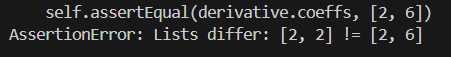
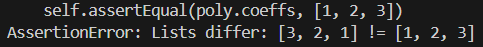
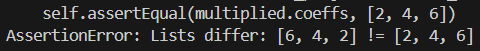
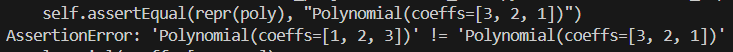
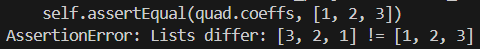

Обчислення були правильними, проте логіка, якою користувався ШІ не підходила для даного коду.

Я вирішила дати ще й асерти, крім коду, щоб подивитися чи допоможе це ШІ.

ШІ змінив свої юніттести. Вони працювали. Проте ШІ не зміг знайти критичні точки, яких немає в асертах, проте є в коді в результаті чого не зміг повністю покрити тести.

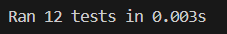
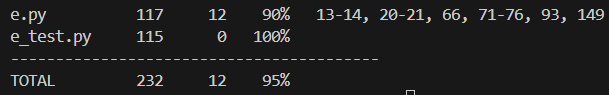

In [ ]:
import unittest
import math

class TestPolynomial(unittest.TestCase):

    def test_init(self):
        p1 = Polynomial([5])
        self.assertEqual(p1.degree, 0)
        self.assertEqual(p1.coeffs, [5])
        self.assertEqual(str(p1), "Polynomial: 5")
        self.assertEqual(repr(p1), 'Polynomial(coeffs=[5])')

        p2 = Polynomial([3, 5])
        self.assertEqual(p2.degree, 1)
        self.assertEqual(p2.coeffs, [5, 3])
        self.assertEqual(str(p2), "Polynomial: 3x+5")

        p3 = Polynomial([1, 5])
        self.assertEqual(str(p3), "Polynomial: x+5")

        p4 = Polynomial([1, 2, 3])
        self.assertEqual(p4.degree, 2)
        self.assertEqual(p4.coeffs, [3, 2, 1])
        self.assertEqual(str(p4), "Polynomial: x**2+2x+3")
        self.assertEqual(repr(p4), "Polynomial(coeffs=[1, 2, 3])")

        p5 = Polynomial([2, -3, 5])
        self.assertEqual(str(p5), "Polynomial: 2x**2-3x+5")

        p6 = Polynomial([2, 0, -5])
        self.assertEqual(str(p6), "Polynomial: 2x**2-5")

        p7 = Polynomial([2, 0, 0])
        self.assertEqual(str(p7), "Polynomial: 2x**2")

        p8 = Polynomial([-1, 0, 0])
        self.assertEqual(str(p8), "Polynomial: -x**2")

        p9 = Polynomial([0, 0, 0, 1, 2])
        self.assertEqual(p9.degree, 1)
        self.assertEqual(p9.coeffs, [2, 1])
        self.assertEqual(str(p9), "Polynomial: x+2")

    def test_eval_at(self):
        p1 = Polynomial([5])
        self.assertEqual(p1.eval_at(0), 5)
        self.assertEqual(p1.eval_at(2), 5)

        p2 = Polynomial([3, 5])
        self.assertEqual(p2.eval_at(0), 5)
        self.assertEqual(p2.eval_at(2), 11)

    def test_equality(self):
        p1 = Polynomial([1, 2, 3])
        p2 = Polynomial([1, 2, 3])
        self.assertEqual(p1, p2)

        self.assertNotEqual(Polynomial([1, 2, 3]), Polynomial([1, 2, 3, 0]))
        self.assertNotEqual(Polynomial([1, 2, 3]), Polynomial([1, 2, 0, 3]))
        self.assertNotEqual(Polynomial([1, 2, 3]), Polynomial([1, -2, 3]))
        self.assertNotEqual(Polynomial([1, 2, 3]), 42)
        self.assertNotEqual(Polynomial([1, 2, 3]), "Wahoo!")

        self.assertEqual(Polynomial([42]), 42)
        self.assertEqual(Polynomial([0, 0, 0, 1, 2]), Polynomial([1, 2]))

        coeffs = [0, 0, 0, 1, 2]
        Polynomial(coeffs)
        self.assertEqual(coeffs, [0, 0, 0, 1, 2])

        coeffs = (0, 0, 0, 1, 2)
        Polynomial(coeffs)
        self.assertEqual(coeffs, (0, 0, 0, 1, 2))

    def test_multiply_by_value(self):
        p4 = Polynomial([1, 2, 3])
        p10 = p4.multiply_by_value(10)
        self.assertIsInstance(p10, Polynomial)
        self.assertEqual(str(p10), 'Polynomial: 10x**2+20x+30')
        self.assertEqual(str(p4), 'Polynomial: x**2+2x+3')

    def test_derivative(self):
        p4 = Polynomial([1, 2, 3])
        p11 = p4.derivative
        self.assertIsInstance(p11, Polynomial)
        self.assertEqual(str(p11), "Polynomial: 2x+2")

    def test_add(self):
        p5 = Polynomial([2, -3, 5])
        p8 = Polynomial([-1, 0, 0])
        p12 = p5 + p8
        self.assertIsInstance(p12, Polynomial)
        self.assertEqual(str(p12), "Polynomial: x**2-3x+5")
        self.assertEqual(str(p5), "Polynomial: 2x**2-3x+5")

    def test_multiply(self):
        p5 = Polynomial([2, -3, 5])
        p8 = Polynomial([-1, 0, 0])
        p13 = p5 * p8
        self.assertIsInstance(p13, Polynomial)
        self.assertEqual(str(p13), "Polynomial: -2x**4+3x**3-5x**2")


class TestQuadratic(unittest.TestCase):

    def test_init(self):
        q1 = Quadratic([3, 2, 1])  # 3x^2 + 2x + 1
        self.assertIsInstance(q1, Quadratic)
        self.assertIsInstance(q1, Polynomial)
        self.assertEqual(q1.eval_at(10), 321)
        self.assertEqual(q1.a, 3)
        self.assertEqual(q1.b, 2)
        self.assertEqual(q1.c, 1)
        self.assertEqual(repr(q1), "Quadratic(a=3, b=2, c=1)")
        self.assertEqual(str(q1), "Quadratic: 3x**2+2x+1")

    def test_discriminant(self):
        q1 = Quadratic([3, 2, 1])
        self.assertEqual(q1.discriminant, -8)

    def test_number_of_real_roots(self):
        q1 = Quadratic([3, 2, 1])
        self.assertEqual(q1.number_of_real_roots, 0)
        q2 = Quadratic([1, -6, 9])
        self.assertEqual(q2.number_of_real_roots, 1)
        q3 = Quadratic([1, 1, -6])
        self.assertEqual(q3.number_of_real_roots, 2)

    def test_get_real_roots(self):
        q2 = Quadratic([1, -6, 9])
        self.assertEqual(q2.get_real_roots(), [3])
        q3 = Quadratic([1, 1, -6])
        roots = q3.get_real_roots()
        self.assertAlmostEqual(roots[0], -3)
        self.assertAlmostEqual(roots[1], 2)

    def test_invalid_quadratic(self):
        with self.assertRaises(ValueError) as context:
            Quadratic([1, 2, 3, 4])
        self.assertEqual(str(context.exception), 'Quadratic polynomial must have exactly 3 coefficients')


if __name__ == "__main__":
    unittest.main()


Після вказівки на це, ШІ так і не виправив тести.

Потім я попросила його надати звіт по неохопленим частинам коду і він надав правильний звіт.

Потім я попросила доробити юніттести, щоб вони охопили їх, проте вони не були вдалими, виникала помилка.

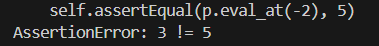

Юніттести, які додав ШІ:

In [ ]:
# Рядки 13-14, 20-21
def test_init_empty_list(self):
    p_empty = Polynomial([])
    self.assertEqual(p_empty.degree, 0)
    self.assertEqual(p_empty.coeffs, [0])
    self.assertEqual(str(p_empty), "Polynomial: 0")
    self.assertEqual(repr(p_empty), 'Polynomial(coeffs=[0])')

def test_init_single_zero_coeff(self):
    p_zero = Polynomial([0])
    self.assertEqual(p_zero.degree, 0)
    self.assertEqual(p_zero.coeffs, [0])
    self.assertEqual(str(p_zero), "Polynomial: 0")
    self.assertEqual(repr(p_zero), 'Polynomial(coeffs=[0])')

# Рядок 66
def test_init_negative_coeff(self):
    p_negative = Polynomial([-1, 2, 3])
    self.assertEqual(p_negative.degree, 2)
    self.assertEqual(p_negative.coeffs, [3, 2, -1])
    self.assertEqual(str(p_negative), "Polynomial: -x**2+2x+3")
    self.assertEqual(repr(p_negative), 'Polynomial(coeffs=[-1, 2, 3])')

# Рядки 71-76, 93
def test_eval_at_with_negative_value(self):
    p = Polynomial([1, 2, 3])
    self.assertEqual(p.eval_at(-2), 5)

# Рядок 149
def test_multiply_by_value_with_zero_value(self):
    p = Polynomial([1, 2, 3])
    p_zero = p.multiply_by_value(0)
    self.assertIsInstance(p_zero, Polynomial)
    self.assertEqual(str(p_zero), 'Polynomial: 0')

Я закоментувала цю частинку коду й інші тести пройшли.

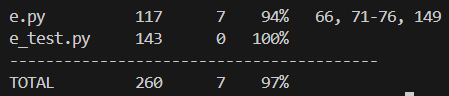

Потім я вирішила оптимізувати ці тести.

До оптимізації:

Після оптимізації з'явилися помилки і час збільшився:

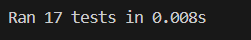

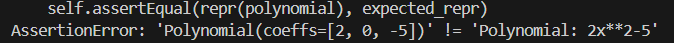 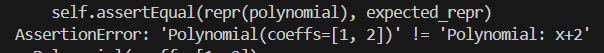 і т.д.

__Висновки:__

1. Загалом ШІ може створити шаблон тестів, проте їх буде мало, вони не покриють весь код. Крім ШІ не може визначити критичних точок. Якщо йому надати код, то він може створити неправильні по логіці юніттести. Якщо ж надати асерти, він просто перетворить їх в юніттести, проте це не допоможе виявити критичні точки.
2. Крім того, ШІ не може допомогти з неохопленими частинами коду. Якщо йому звернути на це увагу, він все одно їх не покриє. Таким чином він не може й виправити помилки, які виникають в самому коді.
3. Проте, якщо попросити звіт про непокриті частини він його надасть і цей звіт буде правильним. Проте покрити частини коду вказані в своєму ж звіті він зможе лише частково.
4. З оптимізацією тестів ШІ допомогти не може, тільки ламає код і час виконання тільки збільшується.